In [1]:
import os
import tarfile
import requests
import pandas as pd

DATASET_URL = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz"
SAVE_PATH = "datasets"

if not os.path.isdir(SAVE_PATH):
    os.makedirs(SAVE_PATH)
    tgz_path = os.path.join(SAVE_PATH, "housing.tgz")
    data = requests.get(DATASET_URL)
    with open(os.path.join(os.getcwd(), tgz_path),"wb") as f:
        f.write(data.content)
    with tarfile.open(tgz_path) as housing_tgz:
        housing_tgz.extractall(path=SAVE_PATH)

def load_housing_data(housing_path=SAVE_PATH):
    csv_path = os.path.join(SAVE_PATH, "housing.csv")
    return pd.read_csv(csv_path)
    

In [2]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


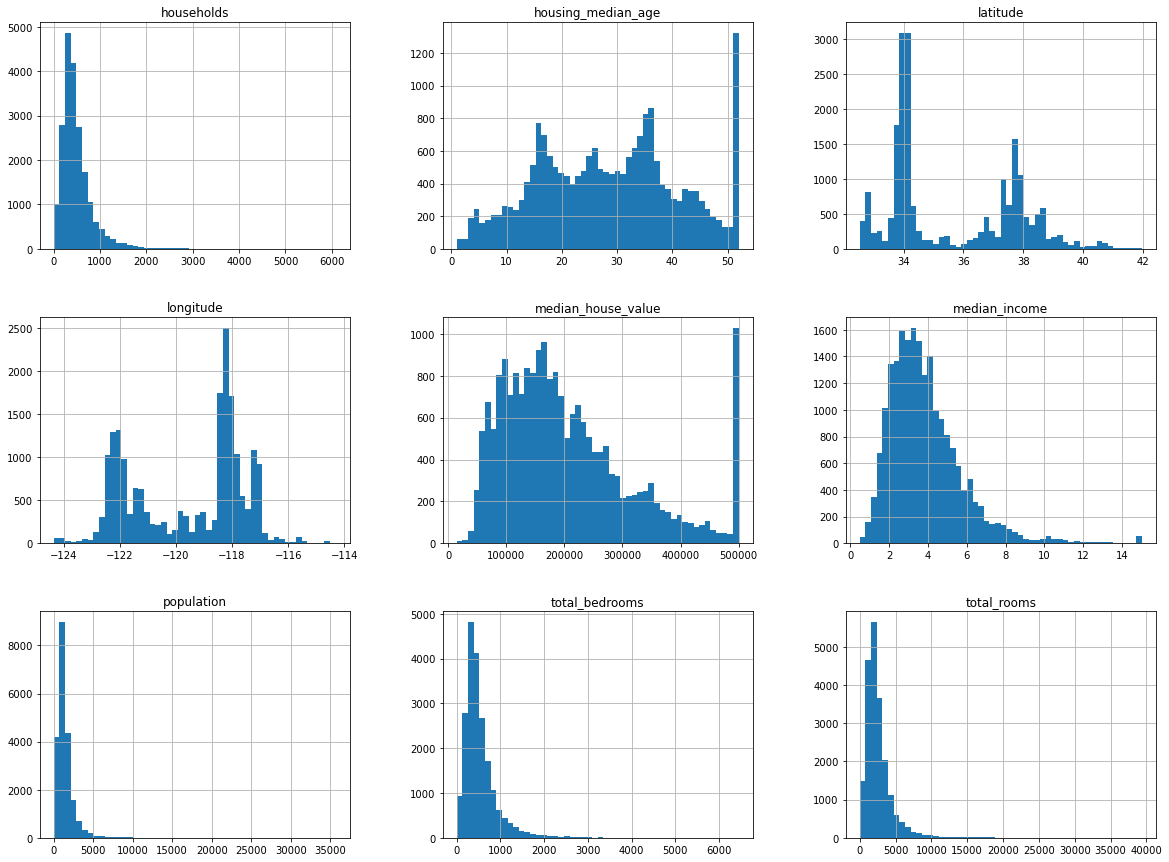

In [3]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.show()

In [4]:
import numpy as np
import hashlib

def split_train_test(data, test_ratio):
    shuffled_indices = np.randomm_.permutation(len(data))
    test_set_size = int(len(data)) * test_ratio
    test_indices = shuffled_indices[:test_set_size]
    terain_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

def test_set_check(identifier, test_ratio, hash):
     return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio
    
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]
 
housing_with_id = housing.reset_index()

housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [5]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state=42)
print(f"Uczace: {len(train_set)}, testowe: {len(test_set)}")

Uczace: 16512, testowe: 4128


In [6]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing['income_cat'] < 5, 5.0, inplace=True)

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)


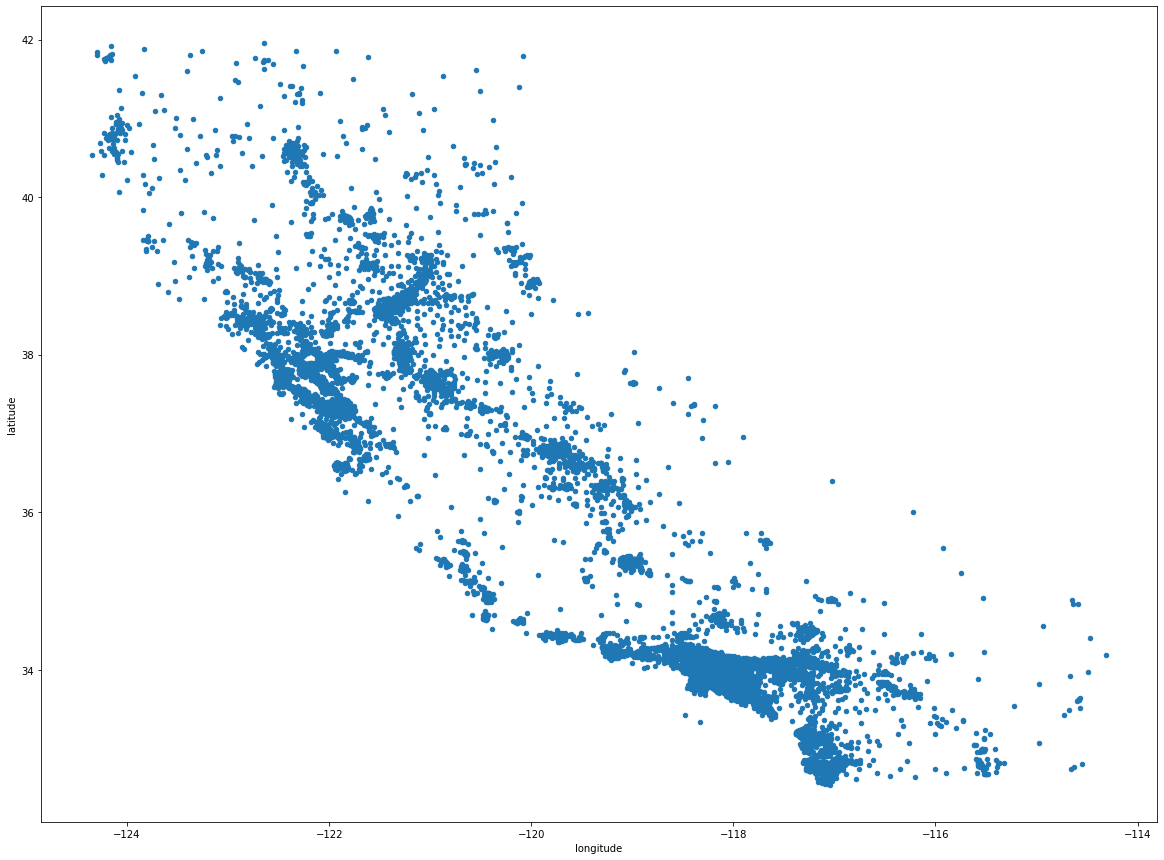

In [9]:
# odkrywanie danych

housing = strat_train_set.copy()

housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(20,15))